<a href="https://colab.research.google.com/github/AlineBarrucci26/Desafio_acelera_dev/blob/main/desafio_acelera_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [ ]:
df_train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#description of the variable we want to predict

In [ ]:
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

#distribution of notes

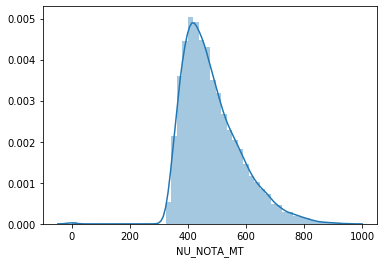

In [ ]:
sns.distplot(df_train['NU_NOTA_MT']);

#Asymmetry and Kurtosis

In [ ]:
print("Skewness:%f"% df_train['NU_NOTA_MT'].skew())
print("Kurtosis:%f"% df_train['NU_NOTA_MT'].kurt())

Skewness:0.920690
Kurtosis:1.422503


# In this analysis, we see in the histogram graph that the broth on the right side is longer, and the mean and mean will be greater than fashion
# And according to the Skewness calculation, the data is moderately skewed
# The Kurtosis data means that the extreme values ​​are lower than the normal distribution

#we will analyze the correlation of math notes with the other notes
#Here I will select the variables that have the highest correlation with the variable "NU_NOTA_MT"

In [ ]:
correlacoes = df_train.corr()
features = correlacoes[(correlacoes['NU_NOTA_MT'] <= -0.3) | (correlacoes['NU_NOTA_MT'] >= 0.3) & (correlacoes['NU_NOTA_MT'] < 1.0)]['NU_NOTA_MT']
features

TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_REDACAO           0.379376
Name: NU_NOTA_MT, dtype: float64

#For a positive correlation, the data will be positioned more to the upper right of the graph, as if they were "rising".
#In a zero correlation or no data will be in the center of the figure and in a negative correlation the data will go in the left direction.

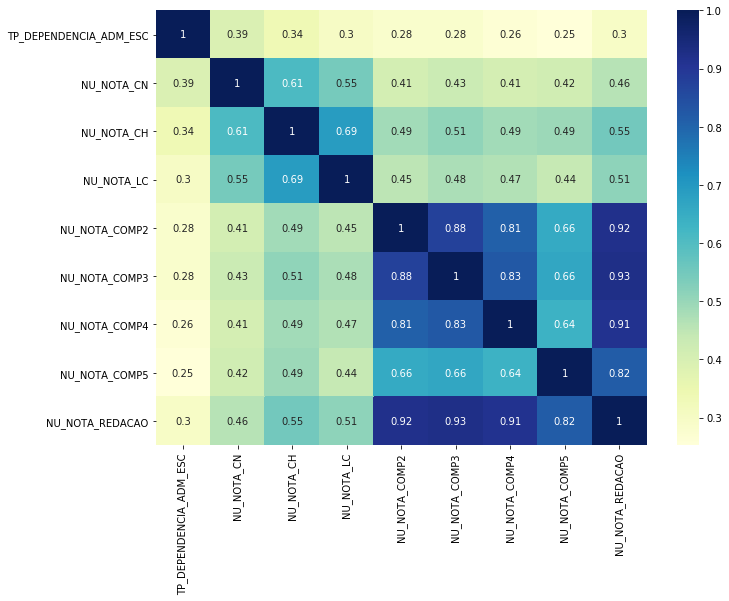

In [ ]:
features_list = features.index.to_list()
corr = df_train[features_list].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10},cmap="YlGnBu")

#we will check the number of missing variables

In [ ]:
df_train[features_list].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    9448
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
NU_NOTA_REDACAO           3597
dtype: int64

In [ ]:
df_train['NU_NOTA_MT'].isnull().sum()

3597

In [ ]:
features_list.append('NU_NOTA_MT')

In [ ]:
df1_train = df_train.copy()
df1_test = df_test.copy()

In [ ]:
def zeroFill(data):
    for item in features_list:
        data[item] = data[item].fillna(0)
    return data

In [ ]:
df1_train = zeroFill(df1_train)
df1_test = df1_test.fillna(0)

#we will check the number of missing variables

In [ ]:
df1_train[features_list].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
NU_NOTA_MT                0
dtype: int64

# Removing the target variable

In [ ]:
features_list.remove('NU_NOTA_MT')

#SEPARA VARIABLES TRAINING AND TESTING AND VARIABLE RESPONSE

In [ ]:
x_train = df1_train[features_list]
y_train = df1_train['NU_NOTA_MT']
x_test = df1_test[features_list]

# HERE WE'LL USE THE LINEAR REGRESSION MODEL

In [ ]:
from sklearn.svm import LinearSVR
modelo = LinearSVR()
modelo.fit(x_train, y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
predicoes_notas_matematica = modelo.predict(x_test)
predicoes_notas_matematica[:5]

array([5.28195429e+02, 6.35317593e+02, 6.82244490e+02, 1.22780132e-04,
       6.53122492e+02])

#NOW LET'S USE THE REGRESSION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(x_train, y_train)
predicoes_notas_matematica = modelo.predict(x_train)